In [1]:
import os
import sv as SV
import numpy as np
import astropy.table as atable

from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.fuji.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.fuji.fits'))
#main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.v3.fits'))

## only use exposures with reliable DEEP truth table

(0.0, 10000.0)

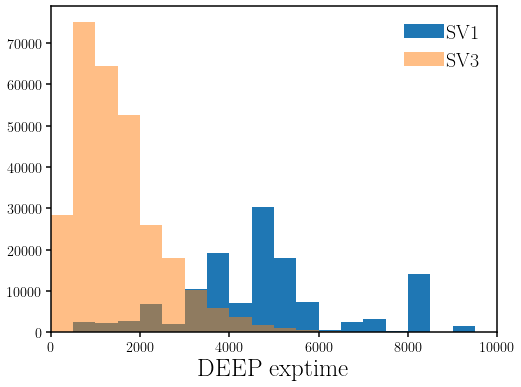

In [4]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

_ = sub.hist(sv1_gals['DEEP_EXPTIME'], range=(0., 1e4), bins=20, label='SV1', histtype='stepfilled')
_ = sub.hist(sv3_gals['DEEP_EXPTIME'], range=(0., 1e4), bins=20, alpha=0.5, label='SV3', histtype='stepfilled')
#_ = sub.hist(main_gals['DEEP_EXPTIME'], range=(0., 1e4), bins=20, alpha=0.5, label='Main', histtype='stepfilled')

sub.legend(loc='upper right', handletextpad=0.1, fontsize=20)

sub.set_xlabel('DEEP exptime', fontsize=25)

sub.set_xlim(0., 1e4)

In [5]:
sv3_gals[:2]

Z_TRUE,TARGETID,DEEP_NUMEXP,DEEP_EXPTIME,DEEP_TSNR2_BGS,DEEP_TRUE,Z,ZERR,ZWARN,CHI2,COEFF [10],NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,PRIORITY,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,TILEID,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,MEAN_FIBER_X,MEAN_FIBER_Y,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,ZSUCCESS,RR_ZWARN,RR_DELTACHI2,RR_SPECTYPE,RR_ZERR,RR_Z,RR_Z_DEEP,EXPID,GMAG_DRED,RMAG_DRED,FIBER_RMAG_DRED,ZMAG_DRED,W1MAG_DRED,W2MAG_DRED,FAINT_FIBCOL,EFFTIME_SPEC,DEEP_EFFTIME_SPEC,SURVEY_SPEED,EFFTIME_ETC,ETC_SURVEY_SPEED
float64,int64,int16,float32,float32,bool,float64,float64,int64,float64,float64,int64,bytes6,bytes20,int64,float64,int16,int32,int64,int32,int32,float64,float64,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int32,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int32,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int64,float64,bytes6,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32
0.07777937216262566,39627751551927574,2,1007.7563,2304.8057,True,0.0777835161191793,6.723634863923742e-06,0,8137.060635402799,558.4959018438403 .. 12.044595689590196,7873,GALAXY,--,10,517.5170710533857,1,417,1417,500,0,182.55632632143863,-1.3780918631807284,0.0,0.0,2015.5,5400.0,1152921504606846976,1,TGT,139.2888,-379.83682,102100,0.9067837874882217,516,9010,1826m015,322458,1302,SER,0.019259246,10.988338,16.706974,22.051287,6.2602177,-2.86036,100.7889,49.290077,12.531658,1.3781968,0.2973808,2.2115772,3.3625429,4.4381704,2.2119832,3.36349,4.4398055,0,6.0,4.018671,-0.10134651,-0.42885458,0,--,0.0,0.0,0.0,0.0,S,102100,9,1152921504606846976,131074,0,0,0,0,0,182.55632632143863,-1.3780918631807284,66,1,572.255,1,1,-0.001,0.001,0.001,0.001,182.55632251473406,0.0,-1.378095431121128,0.0,0.7240783,139.237,-379.755,20.788517,0.008394888,4.175302,4.4886675,53.545322,34.99997,0.21754342,0.10155707,1510.1138,3.6202452,291.49396,0.0042808126,314.09378,2147.0806,1.0249641,5.066993,3.1945856e-06,11.224265,6.288779e-07,0.0,618.33905,4.931991e-06,2.4547005,5.6678476,1530.9023,14.852905,295.66925,4.4929485,985.97815,2182.0806,3.697208,10.836398,True,0,517.5170710533857,GALA

In [6]:
sv1_deep  = (sv1_gals['DEEP_EXPTIME'] > 2000) 
sv3_deep  = (
    np.isin(sv3_gals['PRIORITY'].data, np.array([102100, 102000])) & # remove reobservations
    (sv3_gals['EFFTIME_SPEC'] > 100)) # some exposures with very low spectroscopic efftime

print(np.mean(sv1_deep), np.mean(sv3_deep))
print(np.sum(sv1_deep), np.sum(sv3_deep))

0.9434978117997384 0.6124749551098508
125472 176688


Text(0.5, 0, 'DEEP EFFTIME SPEC')

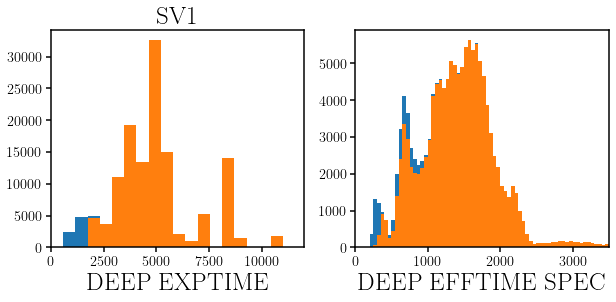

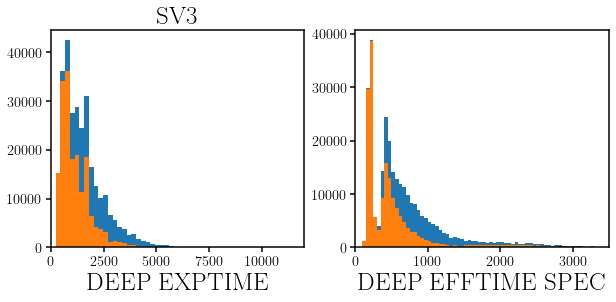

In [7]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(121)
_ = sub.hist(sv1_gals['DEEP_EXPTIME'].data, bins=np.linspace(0.0, 1.1e4, 20))
_ = sub.hist(sv1_gals['DEEP_EXPTIME'].data[sv1_deep], bins=np.linspace(0.0, 1.1e4, 20))
sub.set_xlim(0.0, 1.2e4)
sub.set_xlabel('DEEP EXPTIME', fontsize=25)
sub.set_title('SV1', fontsize=25)
sub = fig.add_subplot(122)
_ = sub.hist(sv1_gals['DEEP_EFFTIME_SPEC'], bins=np.arange(0.0, 1.e4, 50.))
_ = sub.hist(sv1_gals['DEEP_EFFTIME_SPEC'][sv1_deep], bins=np.arange(0.0, 1.e4, 50.))
sub.set_xlim(0.0, 3.5e3)
sub.set_xlabel('DEEP EFFTIME SPEC', fontsize=25)

fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(121)
_ = sub.hist(sv3_gals['DEEP_EXPTIME'].data, bins=np.linspace(0.0, 1.1e4, 50))
_ = sub.hist(sv3_gals['DEEP_EXPTIME'].data[sv3_deep], bins=np.linspace(0.0, 1.1e4, 50))
sub.set_xlim(0.0, 1.2e4)
sub.set_xlabel('DEEP EXPTIME', fontsize=25)
sub.set_title('SV3', fontsize=25)
sub = fig.add_subplot(122)
_ = sub.hist(sv3_gals['DEEP_EFFTIME_SPEC'], bins=np.arange(0.0, 1.e4, 50.))
_ = sub.hist(sv3_gals['DEEP_EFFTIME_SPEC'][sv3_deep], bins=np.arange(0.0, 1.e4, 50.))
sub.set_xlim(0.0, 3.5e3)
sub.set_xlabel('DEEP EFFTIME SPEC', fontsize=25)

In [8]:
sv1_gmag = sv1_gals['GMAG_DRED'] 
sv1_rmag = sv1_gals['RMAG_DRED'] 
sv1_zmag = sv1_gals['ZMAG_DRED']
sv1_rfib = sv1_gals['FIBER_RMAG_DRED']
sv1_colr = sv1_gals['FAINT_FIBCOL']

sv1_brgt = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_lowq = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_LOWQ']) != 0 
sv1_fain = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0

sv3_gmag = sv3_gals['GMAG_DRED']
sv3_rmag = sv3_gals['RMAG_DRED']
sv3_zmag = sv3_gals['ZMAG_DRED']
sv3_rfib = sv3_gals['FIBER_RMAG_DRED']
sv3_colr = sv3_gals['FAINT_FIBCOL']

sv3_brgt = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_fain = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

In [9]:
print('SV3 BGS BRIGHT Z-SUCCESS RATE %.3f' % np.mean(sv3_gals['ZSUCCESS'][sv3_deep & sv3_brgt]))
print('SV3 BGS FAINT Z-SUCCESS RATE %.3f' % np.mean(sv3_gals['ZSUCCESS'][sv3_deep & sv3_fain]))

SV3 BGS BRIGHT Z-SUCCESS RATE 0.984
SV3 BGS FAINT Z-SUCCESS RATE 0.979


sv1
[1.         1.         1.         0.97857143 1.         0.98363095
 0.98806479 0.99440299 0.99366447 0.9867785  0.98291097 0.9633424
 0.92535622 0.81854751]
sv3
[1.         1.         1.         0.99145299 0.98933902 1.
 0.99538867 0.99496709 0.99776604 0.99437722 0.98751516 0.98688454
 0.97835487 0.98449307 0.96840576]


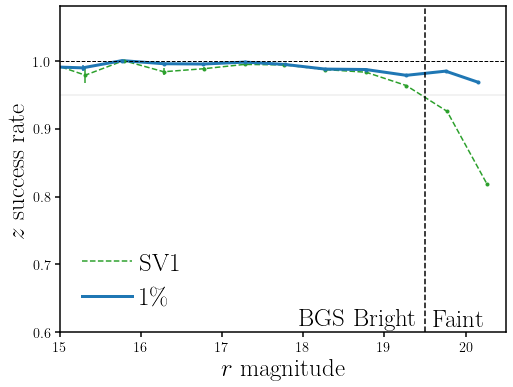

In [10]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

rmid, zsrate, err_zsrate = SV.zsuccess_rate(sv1_rmag[sv1_deep & ~sv1_lowq], sv1_gals['ZSUCCESS'][sv1_deep & ~sv1_lowq], range=(12, 22), nbins=20, bin_min=10)
sub.errorbar(rmid, zsrate, yerr=err_zsrate, fmt='.C2')
print('sv1')
print(zsrate)
sub.plot(rmid, zsrate, c='C2', ls='--', label='SV1')

rmid, zsrate, err_zsrate = SV.zsuccess_rate(sv3_rmag[sv3_deep], sv3_gals['ZSUCCESS'][sv3_deep], range=(12, 22), nbins=20, bin_min=10)
sub.errorbar(rmid, zsrate, yerr=err_zsrate, fmt='.C0')
print('sv3')
print(zsrate)
sub.plot(rmid, zsrate, c='C0', lw=3, label='$1\%$')

sub.axhline(1.0, color='k', linestyle='--', lw=1)

#for hh in np.arange(1., 0.94, -0.01):
sub.axhline(0.95, color='k', linestyle='-', lw=0.1)

sub.axvline(19.5, color='k', linestyle='--')
sub.text(19.4, 0.61, 'BGS Bright', ha='right', fontsize=25, rotation=0)
sub.text(19.6, 0.61, 'Faint', ha='left', fontsize=25, rotation=0)

sub.legend(loc='lower left', fontsize=25, handletextpad=0.3)
sub.set_xlabel('$r$ magnitude', fontsize=25)
sub.set_xlim(15, 20.5)
sub.set_ylabel('$z$ success rate', fontsize=25)
sub.set_ylim(0.6, 1.08)
fig.savefig('figs/zsuccess_rmag.pdf', bbox_inches='tight')

In [11]:
# sample the colormaps that you want to use. Use 128 from each so we get 256
# colors in total
clrs1 = plt.cm.Blues(np.linspace(0.5, 1, 5))
clrs2 = plt.cm.Spectral_r(np.linspace(0.2, 1, 95))
#clrs2 = plt.cm.hot_r(np.linspace(0.2, 0.8, 95))

# combine them and build a new colormap
colors = np.vstack((clrs2, clrs1))
mymap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

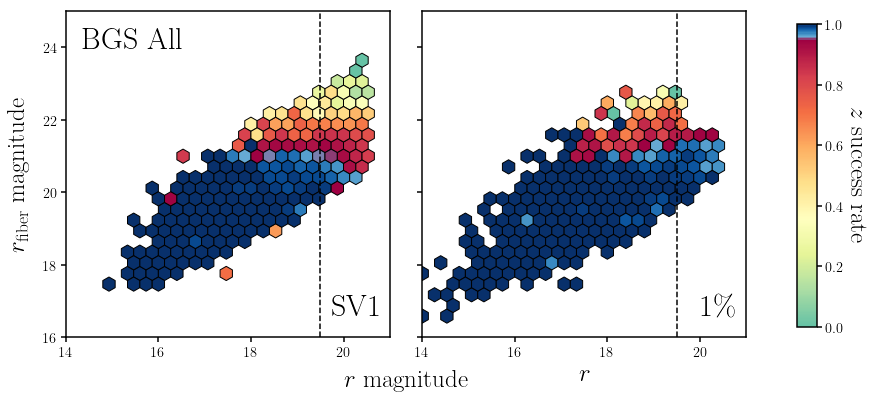

In [12]:
fig = plt.figure(figsize=(14,6))
sub = fig.add_subplot(121)

hb = sub.hexbin(sv1_rmag[sv1_deep & ~sv1_lowq], sv1_rfib[sv1_deep & ~sv1_lowq], C=sv1_gals['ZSUCCESS'][sv1_deep & ~sv1_lowq].astype(float), 
                edgecolors='k', linewidth=1., reduce_C_function=np.mean, extent=(14, 22, 16, 26), gridsize=30, vmin=0., vmax=1., mincnt=10, cmap=mymap)#'Spectral_r')
sub.axvline(19.5, color='k', ls='--')
#sub.scatter([], [], marker='h', s=300, label='SV1', c='C3', alpha=0.75)
#sub.scatter([], [], marker='h', s=200, label='$1\%$', linewidth=3, c='C3', edgecolor='k')
sub.text(0.05, 0.95, r'BGS All', ha='left', va='top', transform=sub.transAxes, fontsize=30)
sub.text(0.975, 0.05, 'SV1', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)

#sub.text(14.5, 20.3, 'fiber-magnitude cut', rotation=39, fontsize=15)
#sub.plot([14, 17.8], [19.1, 22.9], c='k', ls='--', lw=3)
#sub.plot([17.8, 20.0], [22.9, 22.9], c='k', ls='--', lw=3)
#sub.plot([20., 22.], [22.9, 24.9], c='k', ls='--', lw=3)

#sub.plot([19.5, 19.5], [16., 22.9], c='k', ls='--', lw=2)
#sub.plot([20., 20.], [16., 22.9], c='k', ls='--', lw=2)

sub.set_xlim(14, 21)
sub.set_xticks([14, 16, 18, 20])
sub.set_ylim(16, 25)
sub.set_yticks([16, 18, 20, 22, 24])

sub = fig.add_subplot(122)

hb = sub.hexbin(sv3_rmag[sv3_deep], sv3_rfib[sv3_deep], C=sv3_gals['ZSUCCESS'][sv3_deep].astype(float),
                edgecolors='k', linewidth=1., reduce_C_function=np.mean, extent=(14, 22, 16, 26), gridsize=30, vmin=0., vmax=1., mincnt=10, cmap=mymap)
sub.axvline(19.5, color='k', ls='--')

sub.text(0.975, 0.05, '$1\%$', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)
sub.set_xlabel('$r$', fontsize=25)
sub.set_xlim(14, 21)
sub.set_xticks([14, 16, 18, 20])
sub.set_ylim(16, 25)
sub.set_yticks([16, 18, 20, 22, 24])
sub.set_yticklabels([])


bkgd = fig.add_subplot(111, frameon=False)
bkgd.set_xlabel(r'$r$ magnitude', labelpad=10, fontsize=25) 
bkgd.set_ylabel(r'$r_{\rm fiber}$ magnitude', labelpad=10, fontsize=25) 
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.subplots_adjust(wspace=0.1, right=0.8)


cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'$z$ success rate', labelpad=25, fontsize=25, rotation=270)
fig.savefig('figs/zsuccess_rmag_rfib.pdf', bbox_inches='tight')

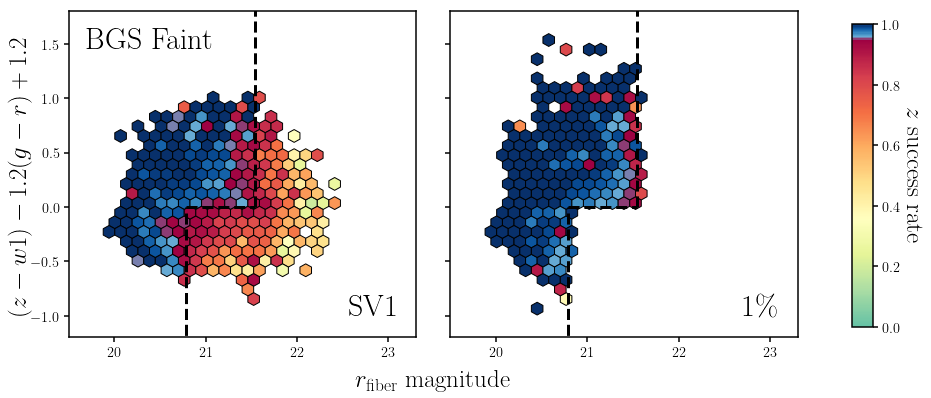

In [15]:
fig = plt.figure(figsize=(15,6))
sub = fig.add_subplot(121)

hb = sub.hexbin(sv1_rfib[sv1_deep & sv1_fain], sv1_colr[sv1_deep & sv1_fain], C=sv1_gals['ZSUCCESS'][sv1_deep & sv1_fain].astype(float),
                reduce_C_function=np.mean, extent=(19.5, 23.3, -1.2, 1.8), gridsize=30, vmin=0., vmax=1., mincnt=10,
                cmap=mymap, edgecolors='k', linewidth=1.)

sub.plot([20.79, 20.79], [-2, 0.], c='k', ls='--', lw=3)
sub.plot([20.79, 21.54], [0., 0.], c='k', ls='--', lw=3)
sub.plot([21.54, 21.54], [0., 2.], c='k', ls='--', lw=3)

sub.text(0.05, 0.95, r'BGS Faint', ha='left', va='top', transform=sub.transAxes, fontsize=30)
sub.text(0.95, 0.05, 'SV1', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)

sub.set_yticks([-1., -0.5, 0., 0.5, 1., 1.5])
sub.set_ylim(-1.2, 1.8)
sub.set_xlim(19.5, 23.3)
sub.set_xticks([20, 21, 22, 23])


sub = fig.add_subplot(122)
hb = sub.hexbin(sv3_rfib[sv3_deep & sv3_fain], sv3_colr[sv3_deep & sv3_fain], C=sv3_gals['ZSUCCESS'][sv3_deep & sv3_fain].astype(float),
                reduce_C_function=np.mean, extent=(19.5, 23.3, -1.2, 1.8), gridsize=30, vmin=0., vmax=1., mincnt=10,
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.95, 0.05, '$1\%$', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)

sub.plot([20.79, 20.79], [-2, 0.], c='k', ls='--', lw=3)
sub.plot([20.79, 21.54], [0., 0.], c='k', ls='--', lw=3)
sub.plot([21.54, 21.54], [0., 2.], c='k', ls='--', lw=3)

sub.set_yticks([-1., -0.5, 0., 0.5, 1., 1.5])
sub.set_ylim(-1.2, 1.8)
sub.set_xlim(19.5, 23.3)
sub.set_xticks([20, 21, 22, 23])
sub.set_yticklabels([])

bkgd = fig.add_subplot(111, frameon=False)
bkgd.set_xlabel(r'$r_{\rm fiber}$ magnitude', labelpad=10, fontsize=25) 
bkgd.set_ylabel(r'$(z - w1) - 1.2 (g - r) + 1.2$', labelpad=10, fontsize=25) 
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.subplots_adjust(wspace=0.1, right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'$z$ success rate', labelpad=25, fontsize=25, rotation=270)
fig.savefig('figs/zsuccess_rfib_col.pdf', bbox_inches='tight')

In [16]:
sv1_zlow = (sv1_gals['Z_TRUE'] <= 0.2) &  (sv1_gals['Z_TRUE'] > 0.)
sv1_zhigh = (sv1_gals['Z_TRUE'] > 0.2) &  (sv1_gals['Z_TRUE'] < 0.6)

sv3_zlow = (sv3_gals['Z_TRUE'] <= 0.2) &  (sv3_gals['Z_TRUE'] > 0.)
sv3_zhigh = (sv3_gals['Z_TRUE'] > 0.2) &  (sv3_gals['Z_TRUE'] < 0.6)

In [17]:
targ_gmag = np.load('/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/target.bgs_bright_S.gmag.npy')
targ_rmag = np.load('/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/target.bgs_bright_S.rmag.npy')
targ_zmag = np.load('/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/target.bgs_bright_S.zmag.npy')

In [23]:
import corner as DFM

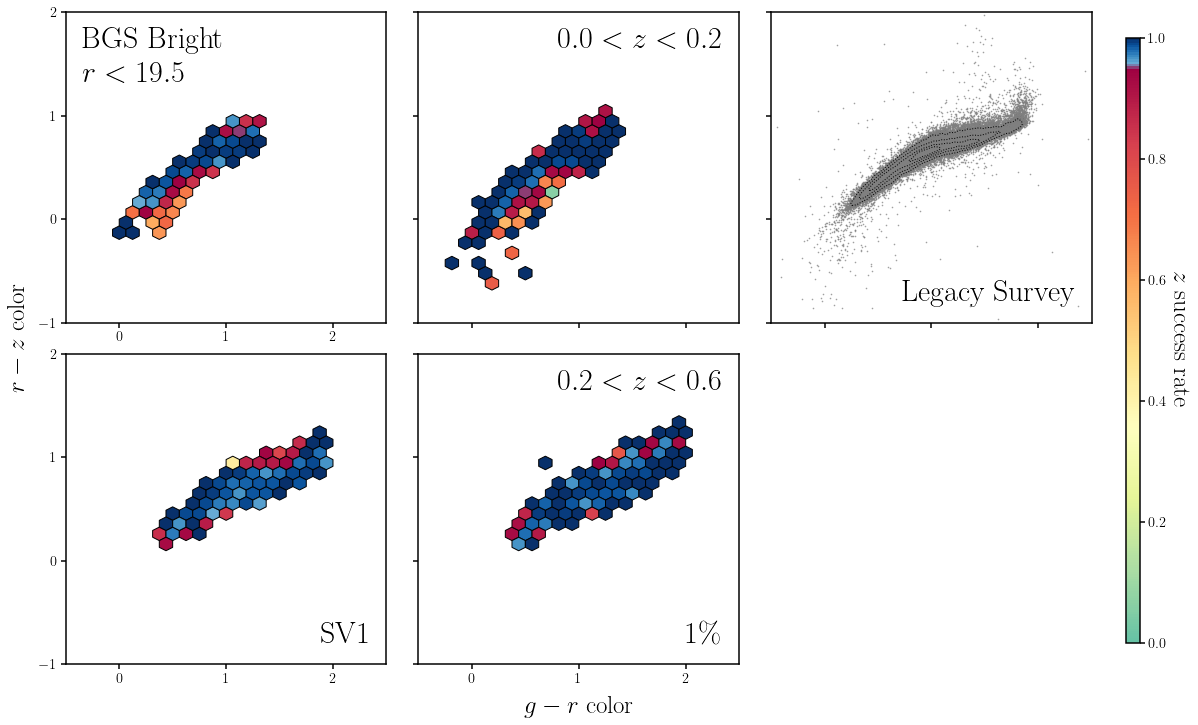

In [ ]:
fig = plt.figure(figsize=(19,12))
sub = fig.add_subplot(233)

DFM.hist2d(targ_gmag - targ_rmag, targ_rmag - targ_zmag, 
           range=[(-0.5, 2.5), (-1, 2)], color='k', 
           plot_density=False, plot_datapoints=True, no_fill_contours=True, 
           bins=200, smooth=True, 
           contour_kwargs={'linewidths': 1, 'linestyles': ':'}, 
           ax=sub)
sub.scatter(targ_gmag - targ_rmag, targ_rmag - targ_zmag, c='gray', s=0.1, rasterized=True)
sub.text(0.95, 0.05, r'Legacy Survey', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_xticks([ 0., 1, 2.])
sub.set_xticklabels([])
sub.set_yticks([-1, 0., 1., 2.])
sub.set_yticklabels([])

sub = fig.add_subplot(231)

hb = sub.hexbin((sv1_gmag - sv1_rmag)[sv1_deep & sv1_brgt & sv1_zlow], (sv1_rmag - sv1_zmag)[sv1_deep & sv1_brgt & sv1_zlow], C=sv1_gals['ZSUCCESS'][sv1_deep & sv1_brgt & sv1_zlow].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.05, 0.95, r'BGS Bright', ha='left', va='top', transform=sub.transAxes, fontsize=30)
sub.text(0.05, 0.84, r'$r < 19.5$', ha='left', va='top', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_xticks([ 0., 1, 2.])
sub.set_yticks([-1, 0., 1., 2.])

sub = fig.add_subplot(234)
hb = sub.hexbin((sv1_gmag - sv1_rmag)[sv1_deep & sv1_brgt & sv1_zhigh], (sv1_rmag - sv1_zmag)[sv1_deep & sv1_brgt & sv1_zhigh], C=sv1_gals['ZSUCCESS'][sv1_deep & sv1_brgt & sv1_zhigh].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.95, 0.05, 'SV1', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_xticks([ 0., 1, 2.])
sub.set_yticks([-1, 0., 1., 2.])

sub = fig.add_subplot(232)

hb = sub.hexbin((sv3_gmag - sv3_rmag)[sv3_deep & sv3_brgt & sv3_zlow], (sv3_rmag - sv3_zmag)[sv3_deep & sv3_brgt & sv3_zlow], C=sv3_gals['ZSUCCESS'][sv3_deep & sv3_brgt & sv3_zlow].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.95, 0.95, '$0.0 < z < 0.2$', ha='right', va='top', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_yticklabels([])
sub.set_xticks([0., 1., 2.])
sub.set_xticklabels([])
sub.set_yticks([-1, 0., 1., 2.])

sub = fig.add_subplot(235)

hb = sub.hexbin((sv3_gmag - sv3_rmag)[sv3_deep & sv3_brgt & sv3_zhigh], (sv3_rmag - sv3_zmag)[sv3_deep & sv3_brgt & sv3_zhigh], C=sv3_gals['ZSUCCESS'][sv3_deep & sv3_brgt & sv3_zhigh].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.95, 0.05, '$1\%$', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)
sub.text(0.95, 0.95, '$0.2 < z < 0.6$', ha='right', va='top', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_yticklabels([])
sub.set_xticks([0., 1., 2.])
sub.set_yticks([-1, 0., 1., 2.])

bkgd = fig.add_subplot(111, frameon=False)
bkgd.set_xlabel(r'$g - r$ color', labelpad=10, fontsize=25) 
bkgd.set_ylabel(r'$r - z$ color', labelpad=10, fontsize=25) 
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.subplots_adjust(wspace=0.1, hspace=0.1, right=0.875)

cbar_ax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'$z$ success rate', labelpad=25, fontsize=25, rotation=270)
fig.savefig('figs/zsuccess_gr_rz.pdf', bbox_inches='tight')

Text(0, 0.5, '$z$ success rate')

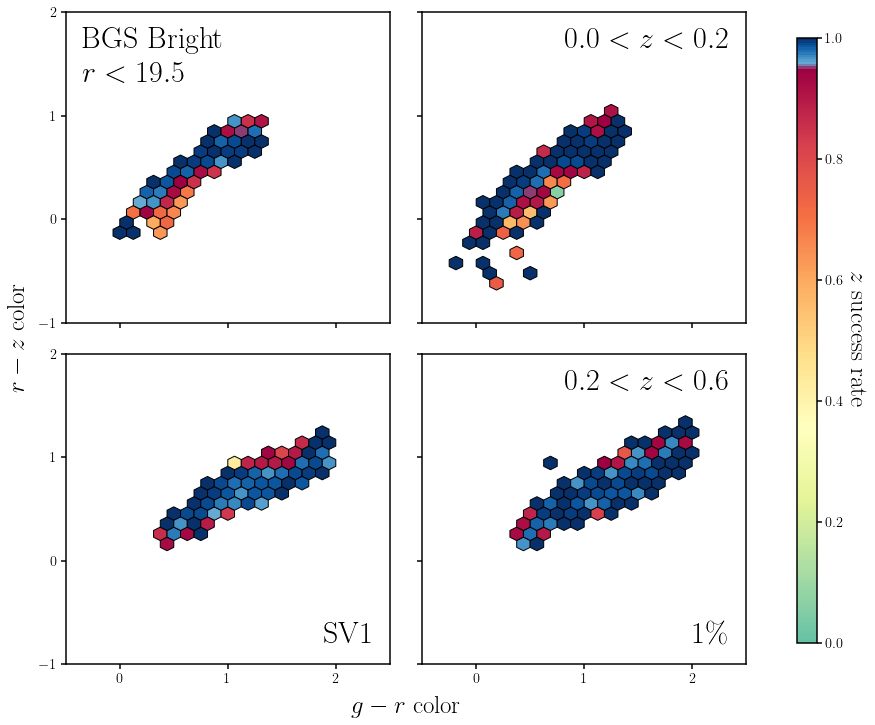

In [38]:
fig = plt.figure(figsize=(14,12))
sub = fig.add_subplot(221)

hb = sub.hexbin((sv1_gmag - sv1_rmag)[sv1_deep & sv1_brgt & sv1_zlow], (sv1_rmag - sv1_zmag)[sv1_deep & sv1_brgt & sv1_zlow], C=sv1_gals['ZSUCCESS'][sv1_deep & sv1_brgt & sv1_zlow].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.05, 0.95, r'BGS Bright', ha='left', va='top', transform=sub.transAxes, fontsize=30)
sub.text(0.05, 0.84, r'$r < 19.5$', ha='left', va='top', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_xticks([ 0., 1, 2.])
sub.set_xticklabels([])
sub.set_yticks([-1, 0., 1., 2.])

sub = fig.add_subplot(223)
hb = sub.hexbin((sv1_gmag - sv1_rmag)[sv1_deep & sv1_brgt & sv1_zhigh], (sv1_rmag - sv1_zmag)[sv1_deep & sv1_brgt & sv1_zhigh], C=sv1_gals['ZSUCCESS'][sv1_deep & sv1_brgt & sv1_zhigh].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.95, 0.05, 'SV1', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_xticks([ 0., 1, 2.])
sub.set_yticks([-1, 0., 1., 2.])

sub = fig.add_subplot(222)

hb = sub.hexbin((sv3_gmag - sv3_rmag)[sv3_deep & sv3_brgt & sv3_zlow], (sv3_rmag - sv3_zmag)[sv3_deep & sv3_brgt & sv3_zlow], C=sv3_gals['ZSUCCESS'][sv3_deep & sv3_brgt & sv3_zlow].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.95, 0.95, '$0.0 < z < 0.2$', ha='right', va='top', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_yticklabels([])
sub.set_xticks([0., 1., 2.])
sub.set_xticklabels([])
sub.set_yticks([-1, 0., 1., 2.])

sub = fig.add_subplot(224)

hb = sub.hexbin((sv3_gmag - sv3_rmag)[sv3_deep & sv3_brgt & sv3_zhigh], (sv3_rmag - sv3_zmag)[sv3_deep & sv3_brgt & sv3_zhigh], C=sv3_gals['ZSUCCESS'][sv3_deep & sv3_brgt & sv3_zhigh].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -1.5, 3), gridsize=40, vmin=0., vmax=1., mincnt=10, 
                cmap=mymap, edgecolors='k', linewidth=1.)
sub.text(0.95, 0.05, '$1\%$', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)
sub.text(0.95, 0.95, '$0.2 < z < 0.6$', ha='right', va='top', transform=sub.transAxes, fontsize=30)

sub.set_xlim(-0.5, 2.5)
sub.set_ylim(-1, 2)
sub.set_yticklabels([])
sub.set_xticks([0., 1., 2.])
sub.set_yticks([-1, 0., 1., 2.])

bkgd = fig.add_subplot(111, frameon=False)
bkgd.set_xlabel(r'$g - r$ color', labelpad=10, fontsize=25) 
bkgd.set_ylabel(r'$r - z$ color', labelpad=10, fontsize=25) 
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.subplots_adjust(wspace=0.1, hspace=0.1, right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(hb, cax=cbar_ax)
cbar.ax.set_ylabel(r'$z$ success rate', labelpad=25, fontsize=25, rotation=270)
#fig.savefig('figs/zsuccess_gr_rz.pdf', bbox_inches='tight')